<ipython-input-5-536eed2b7435>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros(people.target.shape,dtype=np.bool)
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it t

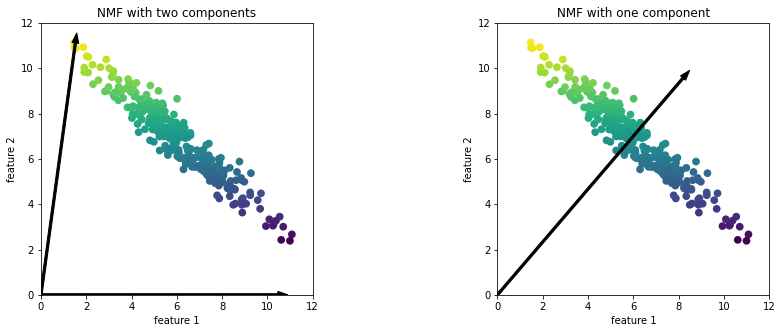

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.505882, ..., 0.253595],
       ...,
       [0.057516, ..., 0.261438]], dtype=float32), 
array([[0.078431, ..., 0.138562],
       ...,
       [0.444444, ..., 0.184314]], dtype=float32))


c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\use

______________________________________________________nmf_faces - 417.0s, 6.9min


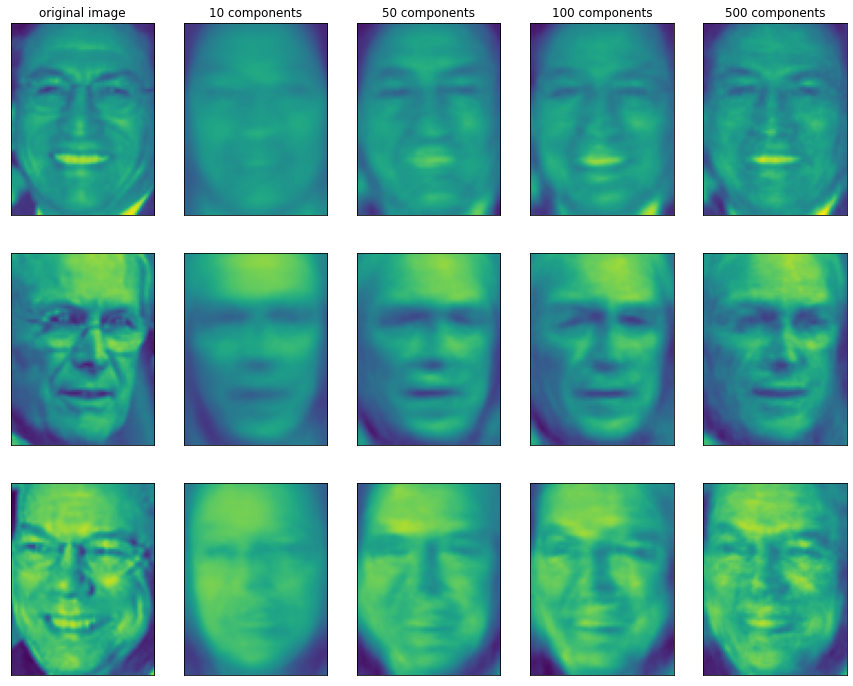

c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


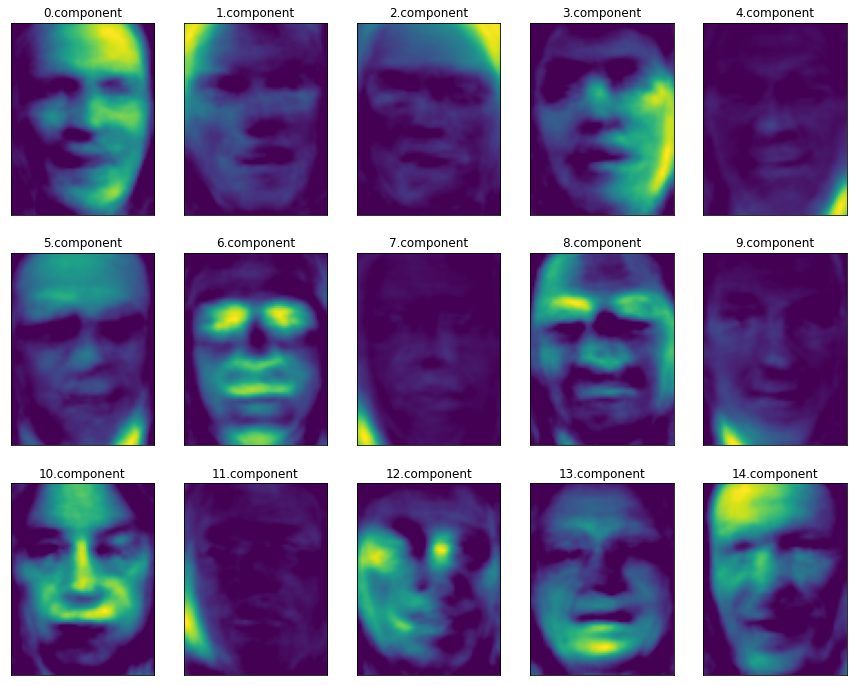

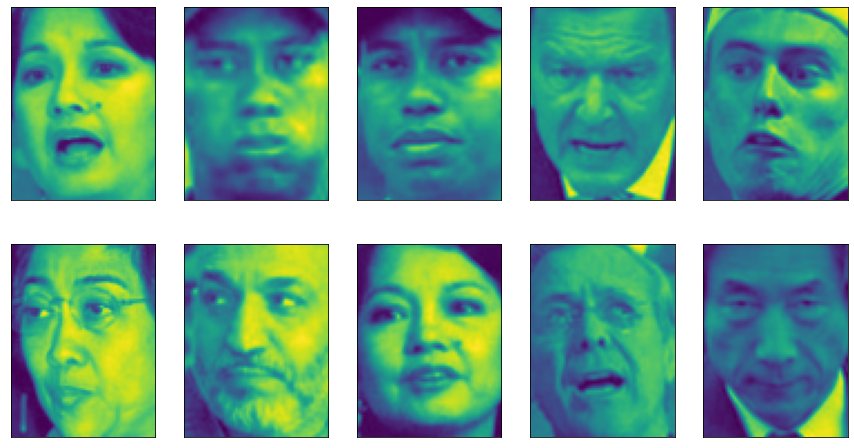

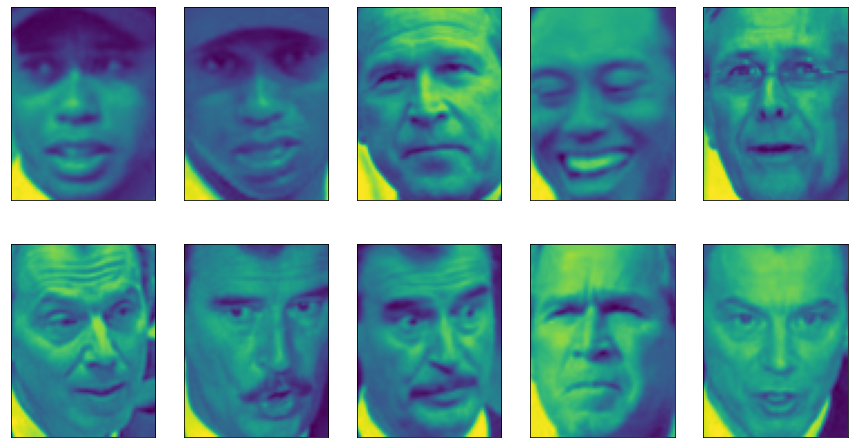

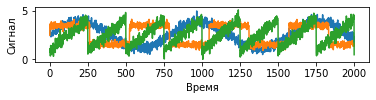

Форма измерений:(2000, 100)
Форма восстановленного сигнала:(2000, 3)


c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


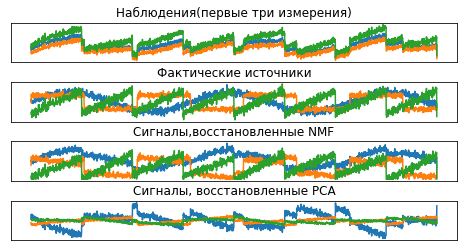

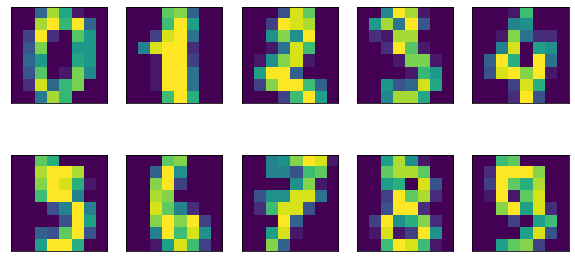

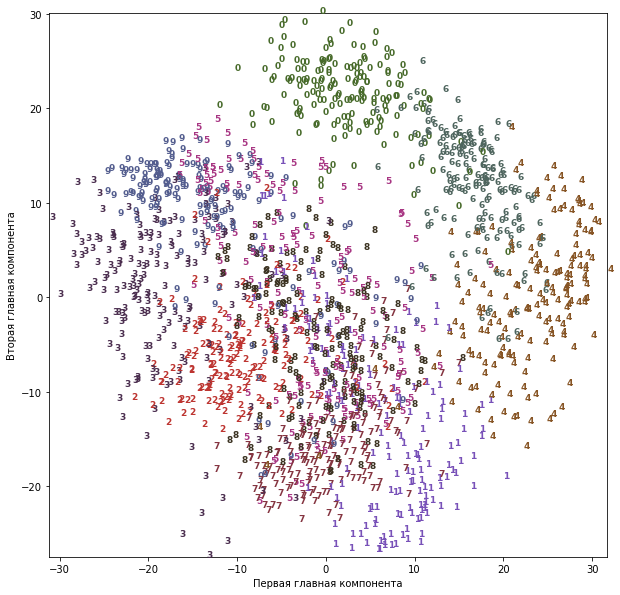

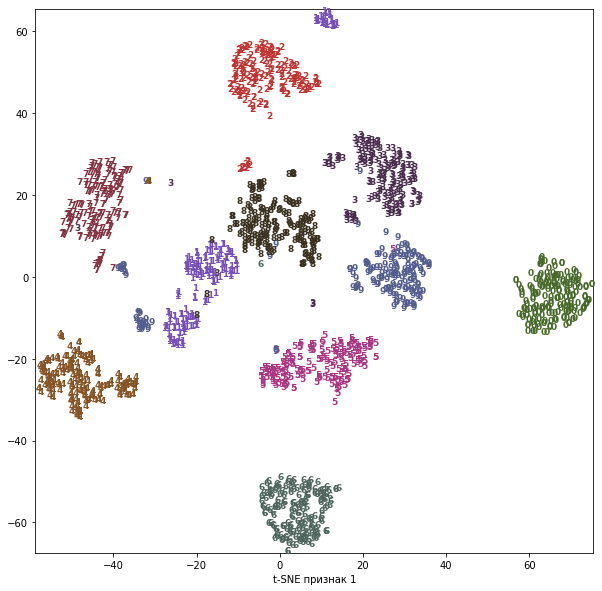

In [5]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape

mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

#для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.


X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_illustration()
plt.show()

mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)
plt.show()

from sklearn.decomposition import NMF

nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)

X_test_nmf = nmf.transform(X_test)
fix,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})

for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))
plt.show()

compn=3
# #сортируем по 3-й компоненте, выводим первые 10 изображений
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
plt.show()

compn=7
#сортируем по 7-й компоненте,выводим первые 10 изображений
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
plt.show()

S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))

plt.plot(S,'-')
plt.xlabel("Время")
plt.ylabel("Сигнал")
plt.show()

A = np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)

print("Форма измерений:{}".format(X.shape))

nmf = NMF(n_components=3,random_state=42)
S_= nmf.fit_transform(X)
print("Форма восстановленного сигнала:{}".format(S_.shape))

pca = PCA(n_components=3)
H = pca.fit_transform(X)
models = [X,S,S_,H]

names = ['Наблюдения(первые три измерения)','Фактические источники','Сигналы,восстановленные NMF','Сигналы, восстановленные PCA']

fig, axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})

for model,name, ax in zip(models, names,axes):
    ax.set_title(name)
    ax.plot(model[:, :3],'-')
plt.show()

from sklearn.datasets import load_digits
digits=load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})

for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)
plt.show()

#строим модель PCA
pca=PCA(n_components=2)
pca.fit(digits.data)

#преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors=["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    #строим график,где цифры представлены символами вместо точек
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]], fontdict={'weight':'bold','size':9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()

from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
#используем метод fit_transfor mвместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    #строим график,где цифры представлены символами вместо точек
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")
plt.show()